### Retrieivng Data from azavea API 

We wanted to get data from Azavea api because they make projections for a century and 
we though it might be a great idea to include this information in our webpage. This is 
just a attemp to retrieve info the way we want to and plot the first graph

In [6]:
# import requests
import requests

In [32]:
# write a basic code to get the info
baseurl = 'https://app.climate.azavea.com'

# your token
token = '<your token key>'
header = {'Authorization': 'Token {}'.format(token)}

# /api/indicator/{indicator_name}/
# we are using /longitude and latitude/green house concentration level/indicator_name
url=baseurl+'/api/climate-data/40.764444/-74.083562/RCP45/indicator/dry_spells/'

# get the info 
response = requests.get(
    url,
    headers=header
)
# /api/climate-data/40.764444/-74.083562/RCP45/indicator/dry_spells/

In [54]:
# check the response var to see 
# what info we fetched
response.text

'{"feature":{"type":"Feature","geometry":{"type":"Point","coordinates":[-74.125,40.875]},"properties":{"datasets":["NEX-GDDP"],"distance_meters":12765,"proximity":{"ocean":false}}},"dataset":"NEX-GDDP","scenario":"RCP45","indicator":{"name":"dry_spells","label":"Dry Spells","description":"Total number of times per period that there are 5 or more consecutive days without precipitation","valid_aggregations":["yearly","quarterly","monthly","offset_yearly","custom"],"variables":["pr"],"available_units":["count"],"default_units":"count","parameters":[{"name":"agg","description":"A list of comma separated aggregation types to return. Valid choices are \'min\', \'max\', \'avg\', \'median\', \'stddev\', \'stdev\', and \'XXth\'. If using \'XXth\', replace the XX with a number between 1-99 to return that percentile. For example, \'99th\' returns the value of the 99th percentile. The \'XXth\' option can be provided multiple times with different values. \'stdev\' is an alias to \'stddev\'. Default

In [58]:
# we are interested in the dictionay that contains data
# load json and check the key 'data'
json.loads(response.text)['data']

{'2048': {'min': 0, 'avg': 3.238095238095238, 'max': 14},
 '2049': {'min': 0, 'avg': 3.0476190476190474, 'max': 11},
 '2050': {'min': 0, 'avg': 2.9523809523809526, 'max': 9},
 '2051': {'min': 0, 'avg': 2.6666666666666665, 'max': 9},
 '2052': {'min': 0, 'avg': 3.0952380952380953, 'max': 10},
 '2053': {'min': 0, 'avg': 3.142857142857143, 'max': 9},
 '2054': {'min': 0, 'avg': 3.0476190476190474, 'max': 8},
 '2055': {'min': 0, 'avg': 2.7142857142857144, 'max': 7},
 '2056': {'min': 0, 'avg': 3.7142857142857144, 'max': 8},
 '2057': {'min': 0, 'avg': 2.9523809523809526, 'max': 12},
 '2058': {'min': 0, 'avg': 3.5238095238095237, 'max': 9},
 '2059': {'min': 0, 'avg': 3.0952380952380953, 'max': 10},
 '2060': {'min': 0, 'avg': 2.7142857142857144, 'max': 7},
 '2061': {'min': 0, 'avg': 3.0952380952380953, 'max': 11},
 '2062': {'min': 0, 'avg': 3.0952380952380953, 'max': 10},
 '2063': {'min': 0, 'avg': 3.380952380952381, 'max': 10},
 '2064': {'min': 0, 'avg': 3.142857142857143, 'max': 9},
 '2065': {

In [60]:
json.dumps(json.loads(response.text)['data'])

'{"2048": {"min": 0, "avg": 3.238095238095238, "max": 14}, "2049": {"min": 0, "avg": 3.0476190476190474, "max": 11}, "2050": {"min": 0, "avg": 2.9523809523809526, "max": 9}, "2051": {"min": 0, "avg": 2.6666666666666665, "max": 9}, "2052": {"min": 0, "avg": 3.0952380952380953, "max": 10}, "2053": {"min": 0, "avg": 3.142857142857143, "max": 9}, "2054": {"min": 0, "avg": 3.0476190476190474, "max": 8}, "2055": {"min": 0, "avg": 2.7142857142857144, "max": 7}, "2056": {"min": 0, "avg": 3.7142857142857144, "max": 8}, "2057": {"min": 0, "avg": 2.9523809523809526, "max": 12}, "2058": {"min": 0, "avg": 3.5238095238095237, "max": 9}, "2059": {"min": 0, "avg": 3.0952380952380953, "max": 10}, "2060": {"min": 0, "avg": 2.7142857142857144, "max": 7}, "2061": {"min": 0, "avg": 3.0952380952380953, "max": 11}, "2062": {"min": 0, "avg": 3.0952380952380953, "max": 10}, "2063": {"min": 0, "avg": 3.380952380952381, "max": 10}, "2064": {"min": 0, "avg": 3.142857142857143, "max": 9}, "2065": {"min": 0, "avg":

### let's convert the json file to pandas dataframe

In [61]:
# Let's load the file into pandas dataframe
import pandas as pd
import json

pd.read_json(json.dumps(json.loads(response.text)['data']))

,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
avg,3.238095,3.047619,2.952381,2.666667,3.095238,3.142857,3.047619,2.714286,3.714286,2.952381,...,3.666667,2.904762,2.666667,3.142857,2.761905,3.285714,2.904762,3.095238,3.285714,2.952381
max,14.000000,11.000000,9.000000,9.000000,10.000000,9.000000,8.000000,7.000000,8.000000,12.000000,...,10.000000,10.000000,9.000000,11.000000,8.000000,11.000000,11.000000,10.000000,8.000000,9.000000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [62]:
# Let's assign that dataframe to a var df
df = pd.read_json(json.dumps(json.loads(response.text)['data']))

In [63]:
df

,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
avg,3.238095,3.047619,2.952381,2.666667,3.095238,3.142857,3.047619,2.714286,3.714286,2.952381,...,3.666667,2.904762,2.666667,3.142857,2.761905,3.285714,2.904762,3.095238,3.285714,2.952381
max,14.000000,11.000000,9.000000,9.000000,10.000000,9.000000,8.000000,7.000000,8.000000,12.000000,...,10.000000,10.000000,9.000000,11.000000,8.000000,11.000000,11.000000,10.000000,8.000000,9.000000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [64]:
# Let transpose the dataframe to ave years in one column
# and other info in columns
df.T

,avg,max,min
2048,3.238095,14.0,0.0
2049,3.047619,11.0,0.0
2050,2.952381,9.0,0.0
2051,2.666667,9.0,0.0
2052,3.095238,10.0,0.0
2053,3.142857,9.0,0.0
2054,3.047619,8.0,0.0
2055,2.714286,7.0,0.0
2056,3.714286,8.0,0.0
2057,2.952381,12.0,0.0


In [52]:
# save the dataframe to a .csv file
df.T.to_csv('min_max.csv')

In [74]:
# check the column names
df.T.columns

Index(['avg', 'max', 'min'], dtype='object')

### data wrangling to plot the df

In [79]:
# assigning a dew df
df1 = df.T

In [80]:
# drop the min column, it's always zero
df2 = df1.drop(columns=['min'])

In [81]:
df2.head()

,avg,max
2048,3.238095,14.0
2049,3.047619,11.0
2050,2.952381,9.0
2051,2.666667,9.0
2052,3.095238,10.0


In [84]:
# let's add a column for years
# right now years are treated as index
df2['year'] = df2.index

In [85]:
df2.head()

,avg,max,year
2048,3.238095,14.0,2048
2049,3.047619,11.0,2049
2050,2.952381,9.0,2050
2051,2.666667,9.0,2051
2052,3.095238,10.0,2052


In [87]:
import matplotlib.pyplot as plt

### Let's plot the graph

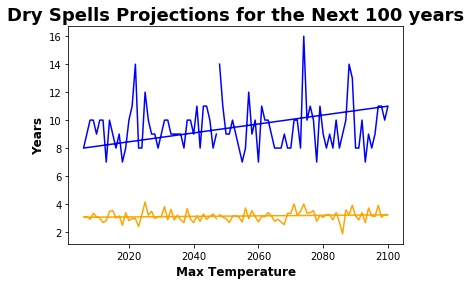

<Figure size 720x720 with 0 Axes>

In [102]:
# plot year on x axis and max temp on y
plt.plot(df2['year'], df2['max'], color='blue')

# in the same plot, plot 'avg' temp too
plt.plot(df2['year'], df2['avg'], color='orange')

# x, y label
plt.xlabel('Max Temperature', fontweight='bold',
         fontsize=12)
plt.ylabel('Years', fontweight='bold',
         fontsize=12)

# title and figure size
plt.title('Dry Spells Projections for the Next 100 years', fontweight='bold',
         fontsize=18)
plt.figure(figsize=(10,10))

plt.show();